In [365]:
from app_store_scraper import AppStore
from pprint import pprint
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
siri_r = AppStore(country="us", app_name = "Shortcuts", app_id= 915249334)
siri_r.review(how_many=100)

pprint(siri_r.reviews)
pprint(siri_r.reviews_count)

2020-09-28 12:56:33,616 [INFO] Base - Initialised: AppStore('us', 'shortcuts', 915249334)
2020-09-28 12:56:33,618 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/shortcuts/id915249334
2020-09-28 12:56:34,389 [INFO] Base - [id:915249334] Fetched 100 reviews (100 fetched in total)


[{'date': datetime.datetime(2019, 9, 23, 1, 44, 24),
  'isEdited': False,
  'rating': 4,
  'review': 'I like having one button or word set my volume, playlist, and '
            'shuffle/repeat, especially when my central nervous system is '
            'acting up and this playlist is something that helps. I really '
            'like it. I also see why other people are wanting more. You have '
            'hooked me and I want more. Right now it is like playing with '
            'blocks in a vacuum: limited output nodes and iOS does not let '
            'Shortcuts know what is going on outside. I have to make broad '
            'assumptions about when most of these shortcuts will fire, my '
            'playlist being an exception because it is completely contained in '
            'my phone. I understand the desire for privacy and not executing '
            'arbitrary programs no matter how small, but Shortcuts is '
            'advertised as being able to order your favorite cof

In [10]:
siri_r.reviews[0]

{'rating': 4,
 'userName': 'C. Morrell',
 'title': 'I like it. I want more.',
 'isEdited': False,
 'date': datetime.datetime(2019, 9, 23, 1, 44, 24),
 'review': 'I like having one button or word set my volume, playlist, and shuffle/repeat, especially when my central nervous system is acting up and this playlist is something that helps. I really like it. I also see why other people are wanting more. You have hooked me and I want more. Right now it is like playing with blocks in a vacuum: limited output nodes and iOS does not let Shortcuts know what is going on outside. I have to make broad assumptions about when most of these shortcuts will fire, my playlist being an exception because it is completely contained in my phone. I understand the desire for privacy and not executing arbitrary programs no matter how small, but Shortcuts is advertised as being able to order your favorite coffee at your favorite cafe. If it is allowed to touch my credit cards, why is it not able to know my locat

In [20]:
siri5 = AppStore(country="us", app_name = "Shortcuts", app_id= 915249334)
siri5.review(how_many=1000)

2020-09-28 13:10:52,892 [INFO] Base - Initialised: AppStore('us', 'shortcuts', 915249334)
2020-09-28 13:10:52,892 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/shortcuts/id915249334
2020-09-28 13:10:55,609 [ERROR] Base - Something went wrong: 'data'
2020-09-28 13:10:55,611 [INFO] Base - [id:915249334] Fetched 540 reviews (540 fetched in total)


In [32]:
siri5.reviews_count

540

In [111]:
# adding versions based on update dates
pd_ss2 = pd.DataFrame()

for i in range(siri5.reviews_count):
    # simple if logic to add version by date filter
    if siri5.reviews[i]["date"] >= datetime.datetime(2019,7,22):
        pd_ss2.loc[i, "ver"] = "2.2.2"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2019,4,29):
        pd_ss2.loc[i, "ver"] = "2.2.1"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2019,3,26):
        pd_ss2.loc[i, "ver"] = "2.2.0"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2019,2,7):
        pd_ss2.loc[i, "ver"] = "2.1.3"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2018,12,5):
        pd_ss2.loc[i, "ver"] = "2.1.2"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2018,11,6):
        pd_ss2.loc[i, "ver"] = "2.1.1"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2018,10,30):
        pd_ss2.loc[i, "ver"] = "2.1.0"
    elif siri5.reviews[i]["date"] >= datetime.datetime(2018,9,17):
        pd_ss2.loc[i, "ver"] = "2.0.0"
    else:
        pd_ss2.loc[i, "ver"] = "pre 2.0"
    pd_ss2.loc[i, "date"] = siri5.reviews[i]["date"]
    pd_ss2.loc[i, "rating"] = siri5.reviews[i]["rating"]
    pd_ss2.loc[i, "title"] = siri5.reviews[i]["title"]
    pd_ss2.loc[i, "review"] = siri5.reviews[i]["review"]

In [116]:
pd_ss2

,ver,date,rating,title,review
0,2.2.2,2019-09-23 01:44:24,4.0,I like it. I want more.,I like having one button or word set my volume...
1,2.0.0,2018-09-21 13:38:38,4.0,Shortcuts improves on Workflow app,I had used the Workflow app for a while before...
2,2.1.1,2018-11-24 23:20:28,4.0,Let me mark reminders as complete!,Apparently this is the easiest way for me to m...
3,2.0.0,2018-10-01 23:13:46,4.0,“Almost” Perfect App,This app is amazing and I am loving what all t...
4,2.2.2,2019-08-16 14:12:13,1.0,Largely Pointless,UPDATE: In the ~10 months since I originally l...
...,...,...,...,...,...
535,2.1.1,2018-11-14 22:11:04,5.0,pretty good,I mainly use it for telling my mom if I'm on m...
536,pre 2.0,2017-08-25 16:03:21,4.0,Works like a champ ...,Please add more functionality to include the a...
537,2.0.0,2018-09-28 16:50:11,2.0,"One step forward, and two back",This got a big overhaul in an awesome way. But...
538,pre 2.0,2017-11-16 13:58:05,1.0,"Useless really, even by Apple.",The things it can do are kid level. \n\nWhere ...


In [118]:
# sorting and removing index for analysis
sorted_pd_ss2 = pd_ss2.sort_values(by=["date"], ascending = False)
clean_pd_ss2 = sorted_pd_ss2.reset_index(drop = True)
clean_pd_ss2

,ver,date,rating,title,review
0,2.2.2,2020-09-25 02:06:54,1.0,I NEED HELP,"I love this, and I downloaded this because I s..."
1,2.2.2,2020-09-24 16:16:28,5.0,I love it,I love it because I finally found how to chan...
2,2.2.2,2020-09-22 04:56:41,1.0,:/,I got this app to be able to change my icons t...
3,2.2.2,2020-08-13 08:32:28,3.0,Trouble,Ok so I downloaded this trying something but v...
4,2.2.2,2020-08-12 05:17:23,3.0,Satisfied except for one thing,"This app is very functional, but when I try to..."
...,...,...,...,...,...
535,pre 2.0,2017-08-21 22:10:40,5.0,"Crashed on 9.3.5, great support",I use it every day. Got great support after th...
536,pre 2.0,2017-08-21 18:32:17,5.0,Makes life sooo much easier,I have workflows set up for several business p...
537,pre 2.0,2017-08-21 00:15:15,5.0,Personalization!,Workflow makes things easier and you get the a...
538,pre 2.0,2017-08-20 02:06:43,4.0,New feature,Can u add another feature to be able downloadi...


In [258]:
# organizing DF for charting reviews per version
rating_df = pd.DataFrame({
    'v 2.2.2': clean_pd_ss2[clean_pd_ss2["ver"] == "2.2.2"]["rating"],
    'v 2.2.1': clean_pd_ss2[clean_pd_ss2["ver"] == "2.2.1"]["rating"],
    'v 2.2.0': clean_pd_ss2[clean_pd_ss2["ver"] == "2.2.0"]["rating"],
    'v 2.1.3': clean_pd_ss2[clean_pd_ss2["ver"] == "2.1.3"]["rating"],
    'v 2.1.2': clean_pd_ss2[clean_pd_ss2["ver"] == "2.1.2"]["rating"],
    'v 2.1.1': clean_pd_ss2[clean_pd_ss2["ver"] == "2.1.1"]["rating"],
    'v 2.1.0': clean_pd_ss2[clean_pd_ss2["ver"] == "2.1.0"]["rating"],
    'v 2.0.0': clean_pd_ss2[clean_pd_ss2["ver"] == "2.0.0"]["rating"],
    'pre 2.0': clean_pd_ss2[clean_pd_ss2["ver"] == "pre 2.0"]["rating"]
})

In [283]:
rating_df.columns

Index(['v 2.2.2', 'v 2.2.1', 'v 2.2.0', 'v 2.1.3', 'v 2.1.2', 'v 2.1.1',
       'v 2.1.0', 'v 2.0.0', 'pre 2.0'],
      dtype='object')

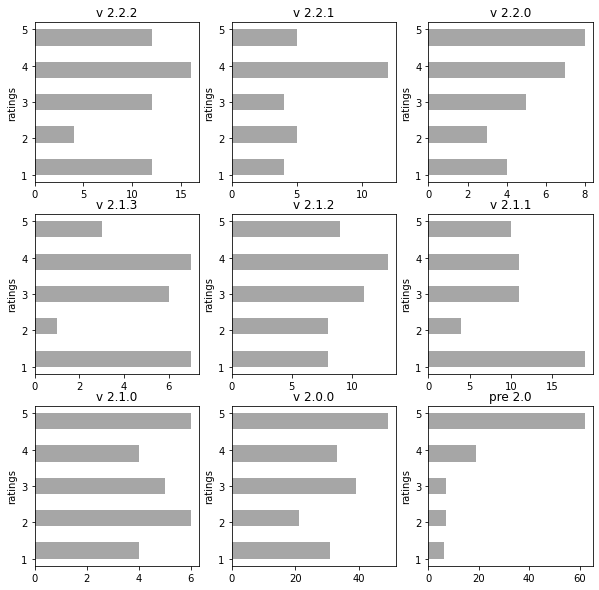

In [285]:
ncols = 3
nrows = int(np.ceil(len(rating_df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot if counter is less than length of columns
        if counter < len(rating_df.columns):

            ax.hist(rating_df[rating_df.columns[counter]], bins=9, color='grey', alpha=0.7, label='{}'.format(rating_df.columns[counter]), orientation = 'horizontal')
            ax.set_ylabel('ratings')
            ax.set_title(rating_df.columns[counter])

        # to prevent error at the end
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [293]:
# review count per versions
review_count_v = clean_pd_ss2.groupby("ver")["review"].count()
print(review_count_v)

ver
2.0.0      173
2.1.0       25
2.1.1       55
2.1.2       49
2.1.3       24
2.2.0       27
2.2.1       30
2.2.2       56
pre 2.0    101
Name: review, dtype: int64


In [301]:
df = pd.DataFrame(review_count_v)
df

,review
ver,
2.0.0,173
2.1.0,25
2.1.1,55
2.1.2,49
2.1.3,24
2.2.0,27
2.2.1,30
2.2.2,56
pre 2.0,101


In [361]:
master_list = []
for i in clean_pd_ss2["review"]:
    splits = i.split(' ')
    lower_splits = [j.lower() for j in splits]
    # using collections to find most_common() words
    frequent = Counter(lower_splits).most_common()
    for k in frequent:
        master_list.append(k)

final_review = Counter()    
for j in master_list:
    final_review[j[0]] += int(j[1])
    

In [362]:
stop_list = ['i', 'it', 'me', 'to', 'my', 'then', 'the', 'an', 'on', 'this', 'and', 'a',
             'is', 'app', 'of', 'for', 'that', 'but', 'you', 'with', 'in', 'be',
             '', 'from', 'so', 'or', 'do']

In [363]:
# removing the stop_list words form the aggregated list
for i in stop_list:
    final_review.pop(i)

In [364]:
# sorted list of most common words
sorted(final_review.items(), key = lambda pair: pair[1], reverse = True)

[('shortcuts', 242),
 ('not', 225),
 ('have', 220),
 ('can', 192),
 ('when', 188),
 ('shortcut', 166),
 ('if', 164),
 ('like', 162),
 ('use', 158),
 ('just', 158),
 ('apple', 157),
 ('would', 156),
 ('as', 152),
 ('siri', 148),
 ('was', 126),
 ('more', 122),
 ('one', 116),
 ('get', 115),
 ('are', 114),
 ('it’s', 112),
 ('work', 108),
 ('all', 101),
 ('time', 99),
 ('make', 93),
 ('there', 91),
 ('at', 90),
 ('add', 89),
 ('will', 88),
 ('has', 88),
 ('your', 88),
 ('app.', 87),
 ('some', 87),
 ('i’m', 85),
 ('workflow', 85),
 ('how', 83),
 ('what', 83),
 ('no', 83),
 ('love', 76),
 ('only', 74),
 ('really', 74),
 ('way', 73),
 ('it.', 72),
 ('please', 72),
 ('other', 71),
 ('out', 71),
 ('up', 71),
 ('phone', 70),
 ('great', 70),
 ('they', 70),
 ('because', 68),
 ('using', 68),
 ('now', 68),
 ('could', 67),
 ('very', 66),
 ('want', 66),
 ('apps', 64),
 ('ios', 64),
 ('able', 62),
 ('home', 61),
 ('don’t', 60),
 ('still', 60),
 ('app,', 59),
 ('open', 59),
 ('much', 59),
 ('see', 59),
 

In [370]:
version = clean_pd_ss2[clean_pd_ss2["ver"] == "2.2.2"]
for i in range(len(version)):
    print(version["date"][i])
    print(version["title"][i])
    print(version["rating"][i])
    print(version["review"][i])
    print("---------------------------------------------------")

2020-09-25 02:06:54
I NEED HELP
1.0
I love this, and I downloaded this because I saw my mom using it. I loved it! Then the trouble came. I got the app. It worked fine. Then I made an icon for FaceTime. It lets me make them, but on an iPad mini it takes me to safari, telling me how to use it, so I try it on my iPhone 6+. Same thing. Please try to fix that. I need help!
---------------------------------------------------
2020-09-24 16:16:28
I love it
5.0
I love it because I finally found  how to change the way all my apps look and I don’t have iOS 14
---------------------------------------------------
2020-09-22 04:56:41
:/
1.0
I got this app to be able to change my icons to different things and every time I try to add my finished shortcut to my home screen, it brings me to a website explaining how to add my shortcut to my home screen. I’m following those directions exactly and it just keeps bring me back to that website. What is going on?
------------------------------------------------